# Mathematical Underpinnings - Lab 5

In [1]:
from sklearn.metrics import mutual_info_score
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr
import seaborn as sns
import pandas as pd

Tests to verify hipoteses of independence (from Lab 4):

In [2]:
def indep_test_asymptotic(X, Y, stat):

    if stat == "mi":

        stat_value = 2*len(X)*mutual_info_score(X, Y)

    if stat == "chi2":

        test_res = (chi2_contingency(pd.crosstab(X, Y)))
        stat_value = test_res.statistic

    df = (len(np.unique(X)) - 1)*(len(np.unique(Y)) - 1)

    p_value = 1 - chi2.cdf(stat_value, df=df)

    return stat_value, p_value

def indep_test_permutation(X, Y, B, stat="mi"):

    stat_value = mutual_info_score(X, Y)

    condition_p_value = 0
    for b in range(B):
        X_b = np.random.permutation(X)

        stat_value_b = mutual_info_score(X_b, Y)

        if stat_value <= stat_value_b:
            condition_p_value += 1

    p_value = (1 + condition_p_value)/(1 + B)

    return 2*len(X)*stat_value, p_value

## Task 1

In [3]:
# a function which computes CMI

def CMI(X, Y, Z):
    mi = 0
    n = len(X)
    z_unique, z_unique_counts = np.unique(Z, return_counts=True)

    for i in range(len(z_unique)):
        X_z = X[Z == z_unique[i]]
        Y_z = Y[Z == z_unique[i]]

        mi += mutual_info_score(X_z, Y_z) * z_unique_counts[i]/n

    return mi

### a)

In [4]:
# CI test based on CMI and asymptotics

def cond_indep_test_asymptotic(X, Y, Z):
    X, Y, Z = X.copy(), Y.copy(), Z.copy()
    n = len(X)
    df = (len(np.unique(X)) - 1) * (len(np.unique(Y)) - 1) * len(np.unique(Z))

    stat_value = 2 * n * CMI(X, Y, Z)
    p_value = 1 - chi2.cdf(stat_value, df=df)
    return stat_value, p_value

### b)

In [5]:
# CI test based on CMI and permutations

def cond_indep_test_permutation(X, Y, Z, B=100):
    X, Y, Z = X.copy(), Y.copy(), Z.copy()
    z_unique = np.unique(Z)
    stat_value = CMI(X, Y, Z)
    condition_p_value = 0

    for b in range(B):
        X_b = X.copy()
        
        for z in z_unique:
            X_b[Z == z] = np.random.permutation(X_b[Z == z])

        stat_value_b = CMI(X_b, Y, Z)

        if stat_value <= stat_value_b:
            condition_p_value += 1

    p_value = (1 + condition_p_value)/(1 + B)
    return 2 * len(X) * stat_value, p_value

### c)

conditionaly independent

In [6]:
eps_1 = np.random.normal(2, 1, 1000)
eps_2 = np.random.normal(0, 1, 1000)
eps_3 = np.random.normal(0, 1, 1000)

X = eps_1 + eps_2
Y = eps_1 + eps_3
Z = eps_1

X_discrete = np.digitize(X, np.histogram(X, bins=10)[1])
Y_discrete = np.digitize(Y, np.histogram(Y, bins=10)[1])
Z_discrete = np.digitize(Z, np.histogram(Z, bins=10)[1])

stat_value, p_value = cond_indep_test_asymptotic(X_discrete, Y_discrete, Z_discrete)
print("Asymptotic test: ", stat_value, p_value)

stat_value, p_value = cond_indep_test_permutation(X_discrete, Y_discrete, Z_discrete)
print("Permutation test: ", stat_value, p_value)

Asymptotic test:  245.67043937892666 1.0
Permutation test:  245.67043937892666 0.900990099009901


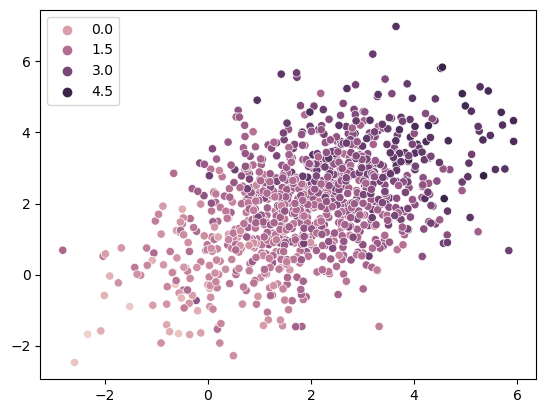

In [7]:
sns.scatterplot(x=X, y=Y, hue=Z)
plt.show()

conditionaly dependent

In [8]:
X = np.random.normal(0, 1, 1000)
Y = np.random.normal(0, 1, 1000)
Z = np.array(np.logical_xor(X > 0, Y > 0), dtype=int)

X_discrete = np.digitize(X, np.histogram(X, bins=10)[1])
Y_discrete = np.digitize(Y, np.histogram(Y, bins=10)[1])
Z_discrete = np.digitize(Z, np.histogram(Z, bins=10)[1])

stat_value, p_value = cond_indep_test_asymptotic(X_discrete, Z_discrete, Y_discrete)
print("Asymptotic test: ", stat_value, p_value)

stat_value, p_value = cond_indep_test_permutation(X_discrete, Z_discrete, Y_discrete)
print("Permutation test: ", stat_value, p_value)

Asymptotic test:  792.0094141450879 0.0
Permutation test:  792.0094141450879 0.009900990099009901


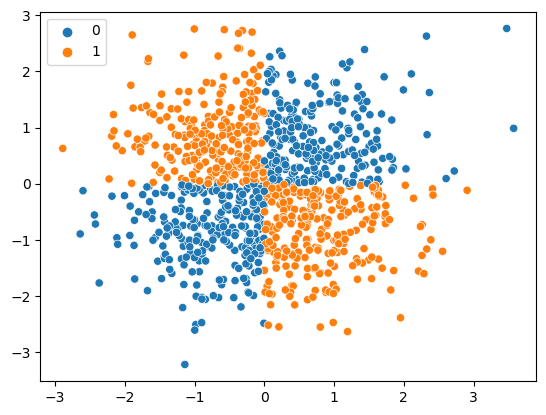

In [9]:
sns.scatterplot(x=X, y=Y, hue=Z)
plt.show()

## Task 2

In [10]:
def sample_from_model1():
    Z_hat = np.random.normal(0, 1, 1000)
    Z = np.array(
        np.where(Z_hat >= 0, 1, -1),
        dtype=int
    )
    
    X_hat = np.random.normal(0, 1, 1000) + Z/2
    Y_hat = np.random.normal(0, 1, 1000) + Z/2
    
    X = np.array(
        np.where(X_hat >= 0, 1, -1),
        dtype=int
    )
    Y = np.array(
        np.where(Y_hat >= 0, 1, -1),
        dtype=int
    )
    
    return X, Y, Z

def sample_from_model2():
    X_hat = np.random.normal(0, 1, 1000)
    X = np.array(
        np.where(X_hat >= 0, 1, -1),
        dtype=int
    )
    
    Z_hat = np.random.normal(0, 1, 1000) + X/2
    Z = np.array(
        np.where(Z_hat >= 0, 1, -1),
        dtype=int
    )
    
    Y_hat = np.random.normal(0, 1, 1000) + Z/2
    Y = np.array(
        np.where(Y_hat >= 0, 1, -1),
        dtype=int
    )
    
    return X, Y, Z

def sample_from_model3():
    X_hat = np.random.normal(0, 1, 1000)
    Y_hat = np.random.normal(0, 1, 1000)
    
    X = np.array(
        np.where(X_hat >= 0, 1, -1),
        dtype=int
    )
    Y = np.array(
        np.where(Y_hat >= 0, 1, -1),
        dtype=int
    )
    
    Z_hat = np.array(np.logical_xor(X > 0, Y > 0), dtype=int) + X/2 + Y/2
    Z = np.array(
        np.where(Z_hat >= 0, 1, -1),
        dtype=int
    )
    
    return X, Y, Z

### a)

answer:

- model 1: 
    - X and Y are conditionally independent given Z
    - X and Y are dependent unconditionally
- model 2: 
    - X and Y are conditionally independent given Z
    - X and Y are dependent unconditionally
- model 3: 
    - X and Y are conditionally dependent given Z
    - X and Y are independent unconditionally

### b)

In [11]:
# for each model compute MI and CMI

models = [sample_from_model1, sample_from_model2, sample_from_model3]
np.random.seed(0)

for i, model in enumerate(models):
    X, Y, Z = model()

    mi = mutual_info_score(X, Y)
    cmi = CMI(X, Y, Z)

    print(f"Model {i+1}:")
    print(f"    MI: {mi}")
    print(f"    CMI: {cmi}")
    print('')

Model 1:
    MI: 0.006181678017947834
    CMI: 0.00030743974553759814

Model 2:
    MI: 0.011598256532607099
    CMI: 0.0005645483581701565

Model 3:
    MI: 5.1787308663731046e-05
    CMI: 0.13686934481233864



### c)

In [12]:
# run permutation test for CMI

models = [sample_from_model1, sample_from_model2, sample_from_model3]
np.random.seed(0)

print("Conditional permutation test results:")
print('')

for i, model in enumerate(models):
    X, Y, Z = model()

    stat_value, p_value = cond_indep_test_permutation(X, Y, Z)
    print(f"Model {i+1}:")
    print(f"    Stat value: {stat_value}")
    print(f"    P value: {p_value}")
    print('')

Conditional permutation test results:

Model 1:
    Stat value: 0.6148794910751962
    P value: 0.693069306930693

Model 2:
    Stat value: 2.0711448171674816
    P value: 0.37623762376237624

Model 3:
    Stat value: 254.64481053782106
    P value: 0.009900990099009901



In [13]:
# run asymptotic test for CMI

models = [sample_from_model1, sample_from_model2, sample_from_model3]
np.random.seed(0)

print("Conditional asymptotic test results:")
print('')

for i, model in enumerate(models):
    X, Y, Z = model()

    stat_value, p_value = cond_indep_test_asymptotic(X, Y, Z)
    print(f"Model {i+1}:")
    print(f"    Stat value: {stat_value}")
    print(f"    P value: {p_value}")
    print('')

Conditional asymptotic test results:

Model 1:
    Stat value: 0.6148794910751962
    P value: 0.735327172956484

Model 2:
    Stat value: 1.129096716340313
    P value: 0.5686168999501087

Model 3:
    Stat value: 273.7386896246773
    P value: 0.0



In [14]:
# run permutation test for MI

models = [sample_from_model1, sample_from_model2, sample_from_model3]
np.random.seed(0)

print("Permutation test results:")
print('')

for i, model in enumerate(models):
    X, Y, Z = model()

    stat_value, p_value = indep_test_permutation(X, Y, 100)
    print(f"Model {i+1}:")
    print(f"    Stat value: {stat_value}")
    print(f"    P value: {p_value}")
    print('')

Permutation test results:

Model 1:
    Stat value: 12.363356035895666
    P value: 0.009900990099009901

Model 2:
    Stat value: 21.17882721748987
    P value: 0.009900990099009901

Model 3:
    Stat value: 1.4672028344797639
    P value: 0.2079207920792079



In [15]:
# run asymptotic test for MI

models = [sample_from_model1, sample_from_model2, sample_from_model3]
np.random.seed(0)

print("Asymptotic test results:")
print('')

for i, model in enumerate(models):
    X, Y, Z = model()

    stat_value, p_value = indep_test_asymptotic(X, Y, "mi")
    print(f"Model {i+1}:")
    print(f"    Stat value: {stat_value}")
    print(f"    P value: {p_value}")
    print('')

Asymptotic test results:

Model 1:
    Stat value: 12.363356035895666
    P value: 0.00043784293104853766

Model 2:
    Stat value: 23.196513065214198
    P value: 1.4626229397629587e-06

Model 3:
    Stat value: 0.10357461732746209
    P value: 0.7475814051675211

